In [69]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# List of FAANG Stocks
1. **Facebook** is an online social media and social networking service company founded in 2004. The company’s primary revenue stream comes from online advertisements. Facebook also owns several prominent subsidiaries, including Instagram, WhatsApp, and Oculus VR.
2. **Amazon** is a diversified technology company operating in e-commerce, consumer electronics, and cloud computing industries. Jeff Bezos established the company in 1994 as an online bookstore. Amazon is now the world’s biggest e-commerce retailer based on market capitalization. The company owns several subsidiaries, including Whole Foods Market (chain of supermarkets) and Twitch (live streaming platform).
3. **Apple** is a multinational technology company based in California, known for selling consumer electronics such as phones, tablets, and computers. It was founded by Steve Jobs and two others in 1976, making it the oldest of the FAANG stocks. Apple went public in December 1980, with an IPO that raised over $100 million (at $22 per share).
4. **Netflix** is a media provider that provides customers with subscription-based online streaming of films and TV shows. Recently, the company entered the content-production industry, producing its own movies and TV shows.
5. **Google (Alphabet)** Headquartered in California, U.S., Google specializes in providing internet-based services and products. It was founded in 1998 by Larry Page and Sergey Brin and is perhaps best known for its web search engine. The company went public in August 2004, offering almost 20 million shares at $85 per share.

# Stocks information

**Date**: This column represents the specific day for which the stock data is recorded.

**Open**: This is the price at which the stock started trading when the market opened on that particular day.

**High**: This indicates the highest price the stock reached during that trading day.

**Low**: This is the lowest price at which the stock was traded during the day.

**Close**: This is the price of the stock at the end of the trading day. It's one of the most commonly used prices for analyzing stock performance.

**Adj Close**: Stands for "Adjusted Close". This price reflects the stock's close price after accounting for any corporate actions that could impact the price, such as dividends, stock splits, or new stock offerings. It is useful for analyzing the real return on investment.

**Volume**: This is the total number of shares that were traded during the day. It helps provide context about the activity level and liquidity of the stock.

In [70]:
# Function to download and format stock data
def download_stock_data(ticker_symbol, start_date, end_date):
    # Download the stock data
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    # Reset the index to remove any multi-level indexing
    stock_data = stock_data.reset_index()

    # Fix potential multi-index issue
    if isinstance(stock_data.columns, pd.MultiIndex):
        # Flatten the columns if it's MultiIndex and keep the first level
        stock_data.columns = stock_data.columns.get_level_values(0)

    # Add the 'Ticker' as a new column
    stock_data['company'] = ticker_symbol

    return stock_data

def format_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    df['date'] = pd.to_datetime(df['date'], utc=True)
    df.set_index('date', inplace=True)
    return df

def round_values(df):
    for column in ['open', 'high', 'low', 'close', 'adj_close', 'volume']:
        df[column] = df[column].apply(lambda x: round(x, 3))
    return df

start_date = "2019-11-01"
end_date= "2024-10-31"

facebook_ticker = "META"
facebook_data = download_stock_data(facebook_ticker, start_date, end_date)
facebook_data = format_columns(facebook_data)
facebook_data = round_values(facebook_data)
amazon_ticker = "AMZN"
amazon_data = download_stock_data(amazon_ticker, start_date, end_date)
amazon_data = format_columns(amazon_data)
amazon_data = round_values(amazon_data)
apple_ticker = "AAPL"
apple_data = download_stock_data(apple_ticker, start_date, end_date)
apple_data = format_columns(apple_data)
apple_data = round_values(apple_data)
netflix_ticker = "NFLX"
netflix_data = download_stock_data(netflix_ticker, start_date, end_date)
netflix_data = format_columns(netflix_data)
netflix_data = round_values(netflix_data)
google_ticker = "GOOG"
google_data = download_stock_data(google_ticker, start_date, end_date)
google_data = format_columns(google_data)
google_data = round_values(google_data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# FACEBOOK

In [71]:
#calculate daily returns
facebook_data['daily_returns'] = facebook_data.adj_close.pct_change() * 100
if facebook_data.index.name == 'date':
    facebook_data.reset_index(inplace=True)

In [72]:
if 'date' in facebook_data.columns:  # Ensure 'date' is only indexed if not already
    facebook_data.set_index('date', inplace=True)

In [73]:
# Calculate monthly returns
facebook_data_monthly = facebook_data.resample("M").last()
facebook_data_monthly['monthly_return'] = facebook_data_monthly['adj_close'].pct_change() * 100

# Calculate annual returns
facebook_data_annual = facebook_data.resample("A").last()
facebook_data_annual['annual_return'] = facebook_data_annual['adj_close'].pct_change() * 100

# Combine monthly and annual returns
facebook_data_periods = facebook_data_monthly[['monthly_return']].join(facebook_data_annual[['annual_return']], how='outer')

# Reset index to make 'date' a column again
facebook_data_periods.reset_index(inplace=True)

# Describe the combined DataFrame
facebook_data_periods.describe()

/var/folders/5c/sspsd_y15mj4xzggy_2t9r0w0000gn/T/ipykernel_33231/2188815303.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



/var/folders/5c/sspsd_y15mj4xzggy_2t9r0w0000gn/T/ipykernel_33231/2188815303.py:6: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



Price,monthly_return,annual_return
count,59.000000,5.000000
mean,2.579514,50.765503
std,11.967447,93.726872
min,-32.634157,-64.221685
25%,-4.033952,23.132849
50%,2.407611,33.086388
75%,9.933945,67.697657
max,26.771102,194.132306


In [74]:
facebook_merged = pd.merge(facebook_data, facebook_data_periods, on='date', how='outer')
facebook_merged.describe()

Price,adj_close,close,high,low,open,volume,daily_returns,monthly_return,annual_return
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1256.000000,59.000000,5.000000
mean,287.713642,288.449666,292.336802,284.444320,288.268051,2.316552e+07,0.129444,2.579514,50.765503
std,114.045791,114.118445,115.118137,113.046027,114.213862,1.569375e+07,2.818176,11.967447,93.726872
min,88.643000,88.910000,90.460000,88.090000,90.080000,5.467500e+06,-26.390088,-32.634157,-64.221685
25%,201.653000,202.260000,205.760000,199.900000,202.250000,1.453120e+07,-1.154092,-4.033952,23.132849
50%,272.121000,272.940000,277.300000,269.410000,272.660000,1.940530e+07,0.133951,2.407611,33.086388
75%,336.238000,337.250000,341.310000,334.190000,337.570000,2.711680e+07,1.437633,9.933945,67.697657
max,595.940000,595.940000,602.950000,589.960000,600.980000,2.323166e+08,23.282458,26.771102,194.132306


# AMAZON


In [75]:
amazon_data['daily_returns'] = amazon_data.adj_close.pct_change() * 100
if amazon_data.index.name == 'date':
    amazon_data.reset_index(inplace=True)

In [76]:
if 'date' in amazon_data.columns:  # Ensure 'date' is only indexed if not already
    amazon_data.set_index('date', inplace=True)

In [77]:
# Calculate monthly returns
amazon_data_monthly = amazon_data.resample("M").last()
amazon_data_monthly['monthly_return'] = amazon_data_monthly['adj_close'].pct_change() * 100

# Calculate annual returns
amazon_data_annual = amazon_data.resample("A").last()
amazon_data_annual['annual_return'] = amazon_data_annual['adj_close'].pct_change() * 100

# Combine monthly and annual returns
amazon_data_periods = amazon_data_monthly[['monthly_return']].join(amazon_data_annual[['annual_return']], how='outer')

# Reset index to make 'date' a column again
amazon_data_periods.reset_index(inplace=True)

# Describe the combined DataFrame
amazon_data_periods.describe()

/var/folders/5c/sspsd_y15mj4xzggy_2t9r0w0000gn/T/ipykernel_33231/3985160854.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/var/folders/5c/sspsd_y15mj4xzggy_2t9r0w0000gn/T/ipykernel_33231/3985160854.py:6: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



Price,monthly_return,annual_return
count,59.000000,5.000000
mean,1.727313,27.348894
std,9.469724,54.325080
min,-23.751971,-49.615216
25%,-4.730355,2.377092
50%,2.546793,26.846123
75%,6.439290,76.255520
max,27.059599,80.880952


In [78]:
amazon_merged = pd.merge(amazon_data, amazon_data_periods, on='date', how='outer')
amazon_merged.describe()

Price,adj_close,close,high,low,open,volume,daily_returns,monthly_return,annual_return
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1256.000000,59.000000,5.000000
mean,142.587662,142.587662,144.359982,140.771759,142.626076,6.907051e+07,0.086139,1.727313,27.348894
std,31.006411,31.006411,31.181270,30.874941,31.096448,3.374720e+07,2.242374,9.469724,54.325080
min,81.820000,81.820000,83.480000,81.301000,82.076000,1.762600e+07,-14.048798,-23.751971,-49.615216
25%,115.890000,115.890000,118.240000,114.250000,116.280000,4.733940e+07,-1.100155,-4.730355,2.377092
50%,151.122000,151.122000,153.745000,148.750000,151.462000,6.060400e+07,0.071350,2.546793,26.846123
75%,167.482000,167.482000,169.038000,165.613000,167.555000,8.208400e+07,1.236559,6.439290,76.255520
max,200.000000,200.000000,201.200000,199.050000,200.090000,3.113460e+08,13.535140,27.059599,80.880952


# APPLE

In [79]:
apple_data['daily_returns'] = apple_data.adj_close.pct_change() * 100
if apple_data.index.name == 'date':
    apple_data.reset_index(inplace=True)

In [80]:
if 'date' in apple_data.columns:  # Ensure 'date' is only indexed if not already
    apple_data.set_index('date', inplace=True)

In [81]:
# Calculate monthly returns
apple_data_monthly = apple_data.resample("M").last()
apple_data_monthly['monthly_return'] = apple_data_monthly['adj_close'].pct_change() * 100

# Calculate annual returns
apple_data_annual = apple_data.resample("A").last()
apple_data_annual['annual_return'] = apple_data_annual['adj_close'].pct_change() * 100

# Combine monthly and annual returns
apple_data_periods = apple_data_monthly[['monthly_return']].join(apple_data_annual[['annual_return']], how='outer')

# Reset index to make 'date' a column again
apple_data_periods.reset_index(inplace=True)

# Describe the combined DataFrame
apple_data_periods.describe()

/var/folders/5c/sspsd_y15mj4xzggy_2t9r0w0000gn/T/ipykernel_33231/2017478003.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/var/folders/5c/sspsd_y15mj4xzggy_2t9r0w0000gn/T/ipykernel_33231/2017478003.py:6: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



Price,monthly_return,annual_return
count,59.000000,5.000000
mean,2.512118,31.905432
std,8.449826,39.946584
min,-12.227670,-26.404231
25%,-4.644163,19.967466
50%,2.317658,34.648252
75%,9.552157,49.008305
max,21.657421,82.307368


In [82]:
apple_merged = pd.merge(apple_data, apple_data_periods, on='date', how='outer')
apple_merged.describe()

Price,adj_close,close,high,low,open,volume,daily_returns,monthly_return,annual_return
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1256.000000,59.000000,5.000000
mean,146.790401,148.460884,149.975009,146.785778,148.327029,9.243444e+07,0.124495,2.512118,31.905432
std,41.725533,41.182549,41.406939,40.936187,41.190178,5.296154e+07,1.996045,8.449826,39.946584
min,54.570000,56.092000,57.125000,53.153000,57.020000,2.404830e+07,-12.864243,-12.227670,-26.404231
25%,123.392000,125.570000,127.130000,124.260000,125.830000,5.738840e+07,-0.831007,-4.644163,19.967466
50%,148.198000,150.020000,151.350000,148.170000,149.690000,7.856970e+07,0.121065,2.317658,34.648252
75%,173.924000,175.460000,177.080000,173.790000,175.310000,1.091802e+08,1.213981,9.552157,49.008305
max,236.480000,236.480000,237.490000,234.450000,236.480000,4.265100e+08,11.980521,21.657421,82.307368


# NETFLIX

In [83]:
netflix_data['daily_returns'] = netflix_data.adj_close.pct_change() * 100
if netflix_data.index.name == 'date':
    netflix_data.reset_index(inplace=True)

In [84]:
if 'date' in netflix_data.columns:  # Ensure 'date' is only indexed if not already
    netflix_data.set_index('date', inplace=True)

In [85]:
# Calculate monthly returns
netflix_data_monthly = netflix_data.resample("M").last()
netflix_data_monthly['monthly_return'] = netflix_data_monthly['adj_close'].pct_change() * 100

# Calculate annual returns
netflix_data_annual = netflix_data.resample("A").last()
netflix_data_annual['annual_return'] = netflix_data_annual['adj_close'].pct_change() * 100

# Combine monthly and annual returns
netflix_data_periods = netflix_data_monthly[['monthly_return']].join(netflix_data_annual[['annual_return']], how='outer')

# Reset index to make 'date' a column again
netflix_data_periods.reset_index(inplace=True)

# Describe the combined DataFrame
netflix_data_periods.describe()

/var/folders/5c/sspsd_y15mj4xzggy_2t9r0w0000gn/T/ipykernel_33231/2005235484.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/var/folders/5c/sspsd_y15mj4xzggy_2t9r0w0000gn/T/ipykernel_33231/2005235484.py:6: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



Price,monthly_return,annual_return
count,59.000000,5.000000
mean,2.292402,29.479035
std,11.875413,50.347319
min,-49.181772,-51.052387
25%,-3.337937,11.412350
50%,2.831628,54.810220
75%,8.366806,65.111232
max,28.609824,67.113762


In [86]:
netflix_merged = pd.merge(netflix_data, netflix_data_periods, on='date', how='outer')
netflix_merged.describe()

Price,adj_close,close,high,low,open,volume,daily_returns,monthly_return,annual_return
count,1257.000000,1257.000000,1257.000000,1257.00000,1257.000000,1.257000e+03,1256.000000,59.000000,5.000000
mean,451.815879,451.815879,458.323429,445.06961,451.690072,6.434492e+06,0.119630,2.292402,29.479035
std,138.915204,138.915204,139.797978,138.13267,139.166035,6.307489e+06,2.870541,11.875413,50.347319
min,166.370000,166.370000,172.060000,162.71000,163.960000,1.144000e+06,-35.116606,-49.181772,-51.052387
25%,342.880000,342.880000,348.510000,337.64000,343.450000,3.355900e+06,-1.187175,-3.337937,11.412350
50%,465.910000,465.910000,470.650000,457.21000,463.000000,4.926800e+06,0.071874,2.831628,54.810220
75%,548.730000,548.730000,555.880000,541.01000,549.460000,7.390000e+06,1.426543,8.366806,65.111232
max,772.070000,772.070000,773.000000,761.12000,765.760000,1.333875e+08,16.854336,28.609824,67.113762


# GOOGLE

In [87]:
google_data['daily_returns'] = google_data.adj_close.pct_change() * 100
if google_data.index.name == 'date':
    google_data.reset_index(inplace=True)

In [88]:
if 'date' in google_data.columns:  # Ensure 'date' is only indexed if not already
    google_data.set_index('date', inplace=True)

In [89]:
# Calculate monthly returns
google_data_monthly = google_data.resample("M").last()
google_data_monthly['monthly_return'] = google_data_monthly['adj_close'].pct_change() * 100

# Calculate annual returns
google_data_annual = google_data.resample("A").last()
google_data_annual['annual_return'] = google_data_annual['adj_close'].pct_change() * 100

# Combine monthly and annual returns
google_data_periods = google_data_monthly[['monthly_return']].join(google_data_annual[['annual_return']], how='outer')

# Reset index to make 'date' a column again
google_data_periods.reset_index(inplace=True)

# Describe the combined DataFrame
google_data_periods.describe()

/var/folders/5c/sspsd_y15mj4xzggy_2t9r0w0000gn/T/ipykernel_33231/141737403.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/var/folders/5c/sspsd_y15mj4xzggy_2t9r0w0000gn/T/ipykernel_33231/141737403.py:6: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



Price,monthly_return,annual_return
count,59.000000,5.000000
mean,2.003031,28.329855
std,7.819297,41.210362
min,-17.674632,-38.671055
25%,-3.964394,25.290749
50%,3.185625,31.028536
75%,7.422430,58.829776
max,16.508364,65.171265


In [90]:
google_merged = pd.merge(google_data, google_data_periods, on='date', how='outer')
google_merged.describe()

Price,adj_close,close,high,low,open,volume,daily_returns,monthly_return,annual_return
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03,1256.000000,59.000000,5.000000
mean,115.824842,116.087342,117.339185,114.813201,116.010182,2.759564e+07,0.101468,2.003031,28.329855
std,32.067377,32.110011,32.350877,31.921605,32.164535,1.266605e+07,2.011587,7.819297,41.210362
min,52.702000,52.831000,53.566000,50.677000,52.826000,6.936000e+06,-11.100153,-17.674632,-38.671055
25%,89.324000,89.543000,90.830000,88.468000,89.540000,1.916600e+07,-0.894330,-3.964394,25.290749
50%,117.424000,117.713000,118.960000,116.234000,117.115000,2.461000e+07,0.205491,3.185625,31.028536
75%,138.845000,139.186000,140.635000,138.005000,139.273000,3.211000e+07,1.104997,7.422430,58.829776
max,192.407000,192.660000,193.310000,190.620000,191.750000,9.779860e+07,9.964903,16.508364,65.171265


# FINANCE COMPANIES

In [93]:
df_JPM = pd.read_csv('../data/clean/analysis_JPM.csv')
df_GS = pd.read_csv('../data/clean/analysis_GS.csv')
df_MSFT = pd.read_csv('../data/clean/analysis_MSFT.csv')
df_NVDA = pd.read_csv('../data/clean/analysis_NVDA.csv')
df_ENSG = pd.read_csv('ENSG_anlysis.csv')
df_UBS = pd.read_csv('UBS_anlysis.csv')

renaming = {'monthly_returns': 'monthly_return', 'annual_returns': 'annual_return'}

def adapt_df(df, company):
    df_filtered = df[['volume', 'daily_returns', 'monthly_returns', 'annual_returns']].rename(columns = renaming)
    df_filtered['company'] = company
    df_filtered = df_filtered[['volume', 'daily_returns', 'monthly_return', 'annual_return', 'company']]
    return df_filtered

JPM_filtered = adapt_df(df_JPM, 'JP Morgan')
GS_filtered = adapt_df(df_GS, 'Goldman Sachs')
MSFT_filtered = adapt_df(df_MSFT, 'microsoft')
NVDA_filtered = adapt_df(df_NVDA, 'nvidia')
ENSG_filtered = adapt_df(df_ENSG, 'ENSG')
UBS_filtered = adapt_df(df_UBS, 'UBS')

# GRAPHS

In [94]:
facebook_stats=facebook_merged.describe()
apple_stats=apple_merged.describe()
amazon_stats=amazon_merged.describe()
netflix_stats=netflix_merged.describe()
google_stats=google_merged.describe()

In [95]:
google_filtered = google_stats.loc[['mean', 'std'], ['volume', 'daily_returns', 'monthly_return', 'annual_return']]
google_filtered['company'] = 'Google'
facebook_filtered = facebook_stats.loc[['mean', 'std'], ['volume', 'daily_returns', 'monthly_return', 'annual_return']]
facebook_filtered['company'] = 'Facebook'
apple_filtered = apple_stats.loc[['mean', 'std'], ['volume', 'daily_returns', 'monthly_return', 'annual_return']]
apple_filtered['company'] = 'Apple'
amazon_filtered = amazon_stats.loc[['mean', 'std'], ['volume', 'daily_returns', 'monthly_return', 'annual_return']]
amazon_filtered['company'] = 'Amazon'
netflix_filtered = netflix_stats.loc[['mean', 'std'], ['volume', 'daily_returns', 'monthly_return', 'annual_return']]
netflix_filtered['company'] = 'Netflix'

In [ ]:
faang_concat = pd.concat([google_filtered, facebook_filtered, apple_filtered, amazon_filtered, netflix_filtered, MSFT_filtered, NVDA_filtered,
                          JPM_filtered, GS_filtered, UBS_filtered])
faang_concat['statistic'] = ['mean', 'std'] * (len(faang_concat) // 2)
faang_concat

,volume,daily_returns,monthly_return,annual_return,company,statistic
mean,2.759564e+07,0.101468,2.003031,28.329855,Google,mean
std,1.266605e+07,2.011587,7.819297,41.210362,Google,std
mean,2.316552e+07,0.129444,2.579514,50.765503,Facebook,mean
std,1.569375e+07,2.818176,11.967447,93.726872,Facebook,std
mean,9.243444e+07,0.124495,2.512118,31.905432,Apple,mean
std,5.296154e+07,1.996045,8.449826,39.946584,Apple,std
mean,6.907051e+07,0.086139,1.727313,27.348894,Amazon,mean
std,3.374720e+07,2.242374,9.469724,54.325080,Amazon,std
mean,6.434492e+06,0.119630,2.292402,29.479035,Netflix,mean
std,6.307489e+06,2.870541,11.875413,50.347319,Netflix,std


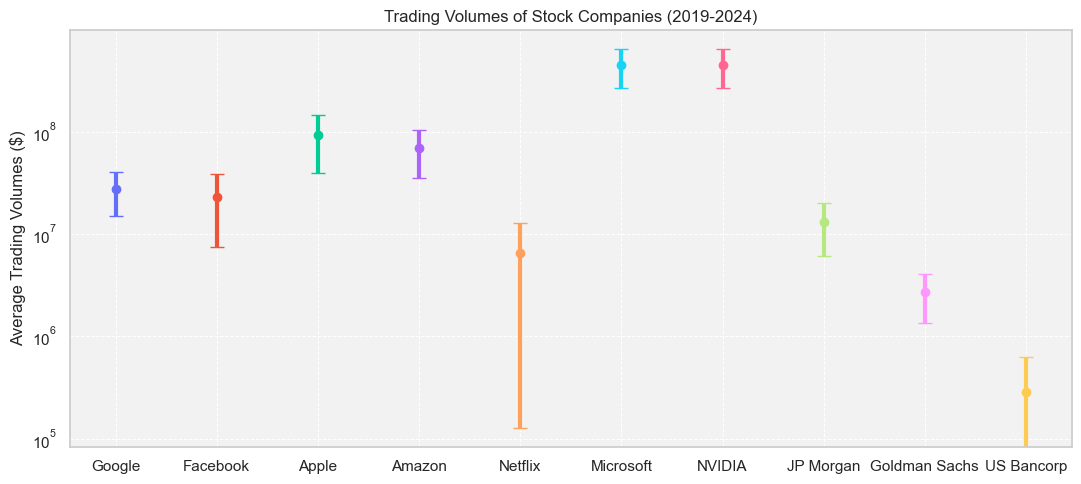

In [117]:
from itertools import cycle

companies = []
means = []
std_devs = []

# Create box plots using the mean ± std approach for each company
for i in range(0, len(faang_concat), 2):
    mean_value = faang_concat.iloc[i]['volume']
    std_value = faang_concat.iloc[i + 1]['volume']
    company_name = faang_concat.iloc[i]['company']

    companies.append(company_name)
    means.append(mean_value)
    std_devs.append(std_value)

companies = ['Google', 'Facebook', 'Apple', 'Amazon', 'Netflix', 'Microsoft', 'NVIDIA', 'JP Morgan', 'Goldman Sachs', 'US Bancorp']
means = np.array(means)
std_devs = np.array(std_devs)

sns.set(style='whitegrid')
plotly_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52', '#A3A3A3', '#D62728']

fig, ax = plt.subplots(figsize=(11,5))
ax.set_facecolor('#f2f2f2')  # Light grey background
ax.grid(True, color='white', linestyle='--', linewidth=0.7)
color_cycle = cycle(plotly_colors)

for i, (company, mean, std) in enumerate(zip(companies, means, std_devs)):
    ax.errorbar(company, mean, yerr=std, fmt='o', color=next(color_cycle), capsize=5, elinewidth = 3)

# Set plot title and labels
plt.title('Trading Volumes of Stock Companies (2019-2024)')
plt.ylabel('Average Trading Volumes ($)')

# Apply a logarithmic scale to the y-axis
plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.savefig('../plots/trading_volume_stocks.png', dpi=300)
plt.show()

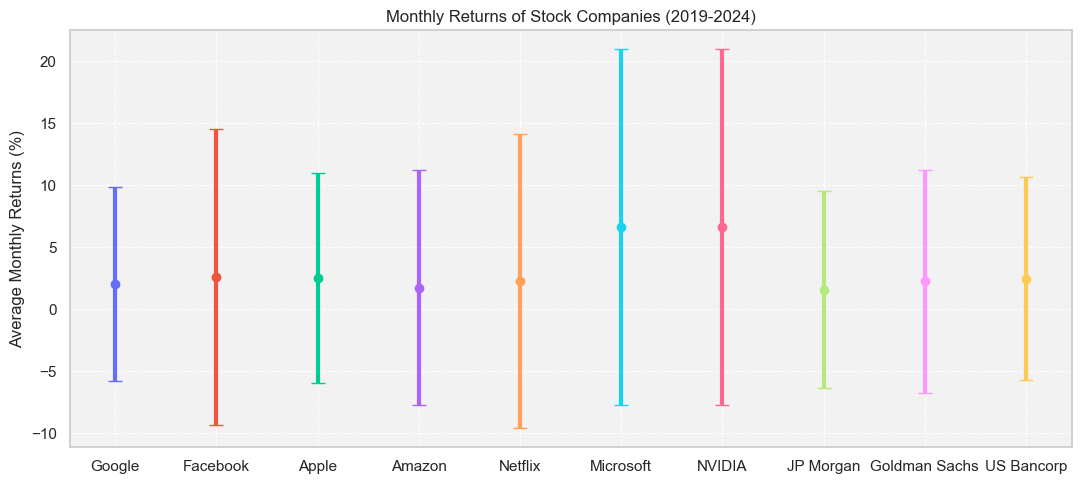

In [118]:
companies = []
means = []
std_devs = []

# Create box plots using the mean ± std approach for each company
for i in range(0, len(faang_concat), 2):
    mean_value = faang_concat.iloc[i]['monthly_return']
    std_value = faang_concat.iloc[i + 1]['monthly_return']
    company_name = faang_concat.iloc[i]['company']

    companies.append(company_name)
    means.append(mean_value)
    std_devs.append(std_value)

companies = ['Google', 'Facebook', 'Apple', 'Amazon', 'Netflix', 'Microsoft', 'NVIDIA', 'JP Morgan', 'Goldman Sachs', 'US Bancorp']
means = np.array(means)
std_devs = np.array(std_devs)

sns.set(style='whitegrid')
plotly_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52', '#A3A3A3', '#D62728']

fig, ax = plt.subplots(figsize=(11,5))
ax.set_facecolor('#f2f2f2')  # Light grey background
ax.grid(True, color='white', linestyle='--', linewidth=0.7)
color_cycle = cycle(plotly_colors)

for i, (company, mean, std) in enumerate(zip(companies, means, std_devs)):
    ax.errorbar(company, mean, yerr=std, fmt='o', color=next(color_cycle), capsize=5, elinewidth = 3)

# Set plot title and labels
plt.title('Monthly Returns of Stock Companies (2019-2024)')
plt.ylabel('Average Monthly Returns (%)')

# Apply a logarithmic scale to the y-axis
#plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.savefig('../plots/monthly_return_stocks.png', dpi=300)
plt.show()

In [103]:
faang_summarize=faang_concat.describe()
faang_summarize = faang_summarize.loc[['mean', 'std'], ['volume', 'daily_returns', 'monthly_return', 'annual_return']]
faang_summarize['company'] = 'FAANG'
faang_summarize = faang_summarize.reset_index()
faang_summarize = faang_summarize.rename(columns={'index': 'statistic'})
faang_summarize

,statistic,volume,daily_returns,monthly_return,annual_return,company
0,mean,7.466478e+07,1.324723,6.600504,50.547497,FAANG
1,std,1.329356e+08,1.258871,4.264960,36.341422,FAANG


In [104]:
mean_values = faang_summarize.loc[0, ['daily_returns', 'monthly_return', 'annual_return']]
std_values = faang_summarize.loc[1, ['daily_returns', 'monthly_return', 'annual_return']]

# Prepare the list of box plots
box_plots = []

# Create a box plot for each return type
for return_type in mean_values.index:
    mean = mean_values[return_type]
    std = std_values[return_type]
    
    box_plots.append(
        go.Box(
            y=[mean - std, mean, mean + std],
            name=return_type,
            boxmean='sd'
        )
    )

# Create the figure
fig = go.Figure(data=box_plots)

# Configure layout
fig.update_layout(
    title="Returns of FAANG Company",
    yaxis_title="Returns",
    xaxis_title="Return Type"
)

# Show the plot
fig.show()
